In [1]:
from math import sqrt
from random import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sim_bunch(prob): # prob is the per-bunch event probability
    trig=random()<prob  # return True if there was an event this bunch. This simulates the physics, the actual source of the randomness.
    particle_property=random() # some property, normalized to 0 to 1. 
    return trig, particle_property
        

In [3]:
def sim_run(n_bunches, prescaling,prob): # we simulate n_bunches bunches, recording how often the trigger fired, and how often the pretrigger fired.
    prescaler=prescaling//2 # we preload to eliminate bias. Often not done.
    triggers=0
    accepted_triggers=0;
    props=[]
    for i in range(n_bunches):
        trig,prop=sim_bunch(prob) 
        if trig: # so the 1st level trigger fired. 
            triggers+=1  # we count up the total of triggeres here, but we don't need to.
            prescaler+=1 # A trigger is fed into the prescaler. Let's see what happens
            if prescaler==prescaling: # This simulates the prescaling counter.  Did this trigger pass the prescaling? 
                #(I.e, does the prescaler overflow?
                prescaler=0 # Yes, so reset counter
                accepted_triggers+=1 # and we accepted that event, it would be saved. Count up the accepted counter.           
                props.append(prop) # since this is a recorded event, we save the particle property
                
    return triggers, accepted_triggers,np.array(props) #note that accepted_triggers is calculated without the knowledge of triggers. 

In [4]:
# Let's simulate one run, with a million bunches, and 1% trigger prob, and 10 prescaling:
scaler=10
triggers,accepted_triggers,props=sim_run(1000000,scaler, 0.01)
print ("Running the experiment once, the electronics fired",triggers,"times. We read out the detectors",accepted_triggers,"times")


Running the experiment once, the electronics fired 10075 times. We read out the detectors 1008 times


In [5]:
#Let's  do it a 100 times (takes about 10 seconds) Increase to 1000 if you have the time.
#I precalulated 1000 for the graphs below, but I reset it to 100 if you want to rerun it.
trig=[]
acc_trig=[]
small_bin=[]
large_bin=[]
other_bin=[]
for i in range(100):
    triggers,accepted_triggers,prop=sim_run(1000000,scaler, 0.01)
    trig.append(triggers)
    acc_trig.append(accepted_triggers)
    # let's simulate a small bin. Say 1% of the range, so 0 to 0.01
    # count how many events had a property value in the small bin:
    n_small=np.count_nonzero(prop<0.01)
    small_bin.append(n_small) # save it
    #same for a large bin, say 80%, so 0 to 0.8:
    n_large=np.count_nonzero(prop<0.8)
    large_bin.append(n_large)
    # Let's also do the other bin (i.e from 0.8 to 1.0) Each recorded event is either in the large bin, or in this.
    n_other=np.count_nonzero(prop>=0.8) 
    other_bin.append(n_other)
    

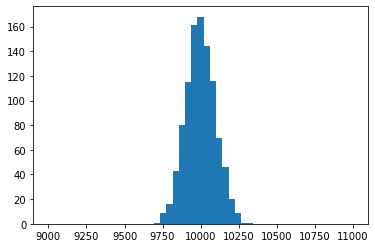

In [6]:
bins=np.linspace(9000, 11000, num=50)
bins_acc=np.linspace(9000/scaler, 11000/scaler, num=50)

d=plt.hist(trig,bins)

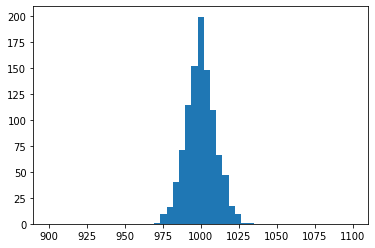

In [7]:
d=plt.hist(acc_trig,bins_acc) #notice the scale. The standard deviation is clearly not 30.

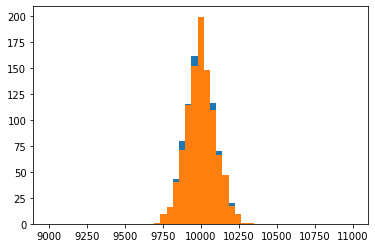

In [8]:
#let's scale up our accepted triggers to estimate the real triggers -> multiply by 10
est_trig=np.array(acc_trig)*scaler
d=plt.hist(trig,bins)
d=plt.hist(est_trig,bins)

In [9]:
#Let's calculate the mean and std.dev
print ("Triggers: ",np.mean(trig),"+-",np.std(trig))
print ("Accepted triggers: ",np.mean(acc_trig),"+-",np.std(acc_trig))
print ("Estimated Triggers: ",np.mean(est_trig),"+-",np.std(est_trig))
#note that we do not need to know the number of real triggers to estimate them very closely,
#with essentially the same std. dev as if we would have collected all


Triggers:  9999.832 +- 97.04701837769154
Accepted triggers:  1000.034 +- 9.700662039263095
Estimated Triggers:  10000.34 +- 97.00662039263094


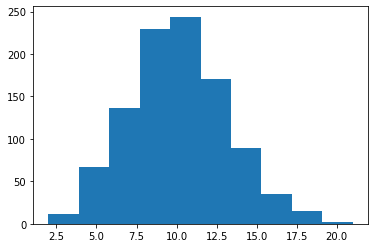

In [10]:
#Now have a look at the small and large bin, and it's covariance:

d=plt.hist(small_bin,10)

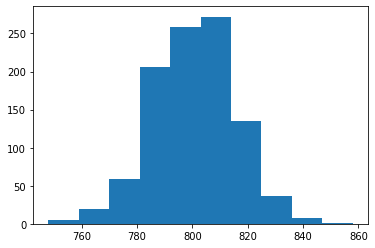

In [11]:
d=plt.hist(large_bin,10)

In [12]:
print ("Small bin: Average content:",np.mean(small_bin),"+-",np.std(small_bin),"Expected from sqrt:",sqrt(np.mean(small_bin)))
print ("Large bin: Average content:",np.mean(large_bin),"+-",np.std(large_bin),"Expected from sqrt:",sqrt(np.mean(large_bin)))    
print ("Other bin: Average content:",np.mean(other_bin),"+-",np.std(other_bin),"Expected from sqrt:",sqrt(np.mean(other_bin)))    

Small bin: Average content: 10.046 +- 3.223644521345367 Expected from sqrt: 3.1695425537449404
Large bin: Average content: 800.134 +- 14.833274891270639 Expected from sqrt: 28.28663995599336
Other bin: Average content: 199.9 +- 13.169586174212156 Expected from sqrt: 14.13859964777276


In [13]:
#let's look at the covariance and correlation coeffients:
print ("Covariance of content in large and other:",np.cov(large_bin,other_bin))
print ("Correlation of content in large and other:",np.corrcoef(large_bin,other_bin)[1,0])


Covariance of content in large and other: [[ 220.24629029 -149.83043043]
 [-149.83043043  173.61161161]]
Correlation of content in large and other: -0.7662250423025369


In [14]:
#exercise: redo with scaling=1 (no scaling). 
#The expected from sqrt match the observed ones (within statistical errors), and  the correlation vanishes
